In [45]:
# load library

import os, sys, time, datetime
# import psycopg2
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime as dt
import ibis
import ibis.selectors as s
from ibis.interactive import *

In [2]:
# options 

ibis.options.interactive = True

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = "AppleGothic"  # 윈도우는 'Malgun Gothic' 사용하세요. 

In [3]:
# 샘플 데이터 가져오기

# ex.penguins

# t = ex.penguins.fetch()
# t

In [4]:
# 네트워크 제한 시

con = ibis.duckdb.connect("mydb.duckdb")
con.list_tables()

# table = con.read_csv("penguins.csv")
# con.create_table("t", table)

['gap', 't']

In [5]:
# 일종의 포인터 정의 잊지 마세요.

t = con.table("t")

In [6]:
# for loop
my_list = [1,2,3,4,5]

for x in my_list:
    print(x**2)

# list comprehension
[x ** 2 for x in my_list]
[x ** 2 for x in my_list if x % 2 == 0]

1
4
9
16
25


[1, 4, 9, 16, 25]

[4, 16]

In [7]:
# 칼럼별 평균 값 계산 : 비추

t.agg(t[c].mean() for c in t.columns if t[c].type().is_numeric())

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Mean(bill_length_mm) ┃ Mean(bill_depth_mm) ┃ Mean(flipper_length_mm) ┃ Mean(body_mass_g) ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ float64              │ float64             │ float64                 │ float64           │
├──────────────────────┼─────────────────────┼─────────────────────────┼───────────────────┤
│             43.92193 │            17.15117 │              200.915205 │       4201.754386 │
└──────────────────────┴─────────────────────┴─────────────────────────┴───────────────────┘

In [8]:
# ibis style

# 수치형 변수만 선택해서 평균 구하기
t.select(s.across(s.numeric(), _.mean()))
t.select(s.across(s.numeric(), _.mean())).head(1)

# 각각의 값에서 평균을 빼기
t
t.mutate(s.across(s.numeric(), _ - _.mean()))

# 그룹핑
t.select(s.numeric(), "island", "species")\
 .group_by("island", "species")\
 .agg(s.across(s.numeric(), _.mean().round(0)))

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ float64           │ float64     │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
│              … │             … │                 … │           … │
└────────────────┴───────────────┴───────────────────┴─────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ float64           │ float64     │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│       43.92193 │      17.15117 │        200.915205 │ 4201.754386 │
└────────────────┴───────────────┴───────────────────┴─────────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │       -4.82193 │       1.54883 │        -19.915205 │ -451.754386 │ Male   │
│ Adelie  │ Torgersen │       -4.42193 │       0.24883 │        -14.915205 │ -401.754386 │ Female │
│ Adelie  │ Torgersen │       -3.62193 │       0.84883 │         -5.915205 │ -951.754386 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │       -7.22193 │       2.14883 │         -7.915205 │ -751.754386 │ Female │
│ Adelie  │ Torgersen │       -4.62193 │       3.44883 │        -10.915205 │ -551.754386 │ Male   │
│ Adelie  │ Torgersen │       -5.02193 │       0.64883 │        -19.915205 │ -576.754386 │ Female │
│ Adelie  │ Torgersen │       -4.72193 │       2.44883 │         -5.915205 │  473.245614 │ Male   │
│ Adelie  │ Torgersen │       -9.82193 │       0.94883 │         -7.915205 │ -726.754386 │ NULL   │
│ Adelie  │ Torgersen │       -1.92193 │       3.04883 │        -10.915205 │   48.245614 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ island    ┃ species   ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ string    │ string    │ int64          │ int64         │ int64             │ int64       │
├───────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┤
│ Biscoe    │ Adelie    │             39 │            18 │               189 │        3710 │
│ Dream     │ Adelie    │             39 │            18 │               190 │        3688 │
│ Torgersen │ Adelie    │             39 │            18 │               191 │        3706 │
│ Dream     │ Chinstrap │             49 │            18 │               196 │        3733 │
│ Biscoe    │ Gentoo    │             48 │            15 │               217 │        5076 │
└───────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┘

In [9]:
# 표준화

# 기존 변수를 변경하는 것

t.mutate(s.across(s.numeric(), (_ - _.mean()) / _.std()))
t.mutate(s.across(s.numeric(), lambda x: (x - x.mean()) / x.std()))

# 기존 변수를 유지하는 것
t.mutate(s.across(s.numeric(), lambda x: (x - x.mean()) / x.std(), names = "{col}_scaled"))

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │      -0.883205 │      0.784300 │         -1.416272 │   -0.563317 │ Male   │
│ Adelie  │ Torgersen │      -0.809939 │      0.126003 │         -1.060696 │   -0.500969 │ Female │
│ Adelie  │ Torgersen │      -0.663408 │      0.429833 │         -0.420660 │   -1.186793 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │      -1.322799 │      1.088129 │         -0.562890 │   -0.937403 │ Female │
│ Adelie  │ Torgersen │      -0.846572 │      1.746426 │         -0.776236 │   -0.688012 │ Male   │
│ Adelie  │ Torgersen │      -0.919837 │      0.328556 │         -1.416272 │   -0.719186 │ Female │
│ Adelie  │ Torgersen │      -0.864888 │      1.240044 │         -0.420660 │    0.590115 │ Male   │
│ Adelie  │ Torgersen │      -1.799025 │      0.480471 │         -0.562890 │   -0.906229 │ NULL   │
│ Adelie  │ Torgersen │      -0.352029 │      1.543873 │         -0.776236 │    0.060160 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │      -0.883205 │      0.784300 │         -1.416272 │   -0.563317 │ Male   │
│ Adelie  │ Torgersen │      -0.809939 │      0.126003 │         -1.060696 │   -0.500969 │ Female │
│ Adelie  │ Torgersen │      -0.663408 │      0.429833 │         -0.420660 │   -1.186793 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │      -1.322799 │      1.088129 │         -0.562890 │   -0.937403 │ Female │
│ Adelie  │ Torgersen │      -0.846572 │      1.746426 │         -0.776236 │   -0.688012 │ Male   │
│ Adelie  │ Torgersen │      -0.919837 │      0.328556 │         -1.416272 │   -0.719186 │ Female │
│ Adelie  │ Torgersen │      -0.864888 │      1.240044 │         -0.420660 │    0.590115 │ Male   │
│ Adelie  │ Torgersen │      -1.799025 │      0.480471 │         -0.562890 │   -0.906229 │ NULL   │
│ Adelie  │ Torgersen │      -0.352029 │      1.543873 │         -0.776236 │    0.060160 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ bill_length_mm_scaled ┃ bill_depth_mm_scaled ┃ flipper_length_mm_scaled ┃ body_mass_g_scaled ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │ float64               │ float64              │ float64                  │ float64            │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────────────────────┼──────────────────────┼──────────────────────────┼────────────────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │             -0.883205 │             0.784300 │                -1.416272 │          -0.563317 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │             -0.809939 │             0.126003 │                -1.060696 │          -0.500969 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │             -0.663408 │             0.429833 │                -0.420660 │          -1.186793 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │                  NULL │                 NULL │                     NULL │               NULL │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │             -1.322799 │             1.088129 │                -0.562890 │          -0.937403 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │             -0.846572 │             1.746426 │                -0.776236 │          -0.688012 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │             -0.919837 │             0.328556 │                -1.416272 │          -0.719186 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │             -0.864888 │             1.240044 │                -0.420660 │           0.590115 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │             -1.799025 │             0.480471 │                -0.562890 │          -0.906229 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │             -0.352029 │             1.543873 │                -0.776236 │           0.060160 │
│ …       │ …         │              … │             … │                 … │           … │ …      │                     … │                    … │                        … │                  … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────────────────────┴──────────────────────┴──────────────────────────┴────────────────────┘

In [10]:
tmp = t.mutate(s.across(s.numeric(), (_ - _.mean()) / _.std()))
tmp.to_sql()

```sql
SELECT
  "t0"."species",
  "t0"."island",
  (
    "t0"."bill_length_mm" - AVG("t0"."bill_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
  ) / STDDEV_SAMP("t0"."bill_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS "bill_length_mm",
  (
    "t0"."bill_depth_mm" - AVG("t0"."bill_depth_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
  ) / STDDEV_SAMP("t0"."bill_depth_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS "bill_depth_mm",
  (
    "t0"."flipper_length_mm" - AVG("t0"."flipper_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
  ) / STDDEV_SAMP("t0"."flipper_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS "flipper_length_mm",
  (
    "t0"."body_mass_g" - AVG("t0"."body_mass_g") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
  ) / STDDEV_SAMP("t0"."body_mass_g") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS "body_mass_g",
  "t0"."sex"
FROM "t" AS "t0"
```

In [11]:
import ibis
print(ibis.__version__)

# 갑자기 버전 확인은 왜 해? -> s.c() 함수가 버전에 따라 작동안하기도 함 -> s.contains()

11.0.0


In [12]:
# 수치형 변수를 표준화 하지만 연도는 제외

t.mutate(s.across(s.numeric() &  ~s.contains("year"), (_ - _.mean()) / _.std()))

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │      -0.883205 │      0.784300 │         -1.416272 │   -0.563317 │ Male   │
│ Adelie  │ Torgersen │      -0.809939 │      0.126003 │         -1.060696 │   -0.500969 │ Female │
│ Adelie  │ Torgersen │      -0.663408 │      0.429833 │         -0.420660 │   -1.186793 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │      -1.322799 │      1.088129 │         -0.562890 │   -0.937403 │ Female │
│ Adelie  │ Torgersen │      -0.846572 │      1.746426 │         -0.776236 │   -0.688012 │ Male   │
│ Adelie  │ Torgersen │      -0.919837 │      0.328556 │         -1.416272 │   -0.719186 │ Female │
│ Adelie  │ Torgersen │      -0.864888 │      1.240044 │         -0.420660 │    0.590115 │ Male   │
│ Adelie  │ Torgersen │      -1.799025 │      0.480471 │         -0.562890 │   -0.906229 │ NULL   │
│ Adelie  │ Torgersen │      -0.352029 │      1.543873 │         -0.776236 │    0.060160 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [13]:
# sql로 보면...

tmp = t.mutate(s.across(s.numeric() & ~s.contains("year"), (_ - _.mean()) / _.std()))

tmp.to_sql()

```sql
SELECT
  "t0"."species",
  "t0"."island",
  (
    "t0"."bill_length_mm" - AVG("t0"."bill_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
  ) / STDDEV_SAMP("t0"."bill_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS "bill_length_mm",
  (
    "t0"."bill_depth_mm" - AVG("t0"."bill_depth_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
  ) / STDDEV_SAMP("t0"."bill_depth_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS "bill_depth_mm",
  (
    "t0"."flipper_length_mm" - AVG("t0"."flipper_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
  ) / STDDEV_SAMP("t0"."flipper_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS "flipper_length_mm",
  (
    "t0"."body_mass_g" - AVG("t0"."body_mass_g") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
  ) / STDDEV_SAMP("t0"."body_mass_g") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS "body_mass_g",
  "t0"."sex"
FROM "t" AS "t0"
```

In [14]:
# 그룹별 적용

t.group_by("species")\
 .mutate(s.across(s.numeric() & ~s.contains("year"), (_ - _.mean()) / _.std()))

┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Gentoo  │ Biscoe │      -0.455854 │     -1.816223 │         -0.954050 │   -1.142626 │ Female │
│ Gentoo  │ Biscoe │      -0.975022 │     -0.287513 │         -0.491442 │   -0.448342 │ Female │
│ Gentoo  │ Biscoe │       0.387793 │     -0.898997 │         -1.108253 │   -1.241809 │ Female │
│ Gentoo  │ Biscoe │       0.809616 │      0.222056 │          0.125368 │    1.237778 │ Male   │
│ Gentoo  │ Biscoe │       0.030865 │     -0.491341 │         -0.337240 │    0.642677 │ Male   │
│ Gentoo  │ Biscoe │      -0.326062 │     -1.510481 │         -1.108253 │   -1.043442 │ Female │
│ Gentoo  │ Biscoe │      -0.682990 │     -0.389427 │         -0.954050 │   -0.547525 │ Female │
│ Gentoo  │ Biscoe │      -0.261167 │      0.323970 │          0.279571 │    0.245943 │ Male   │
│ Gentoo  │ Biscoe │      -1.364397 │     -1.612395 │         -1.262455 │   -1.340993 │ Female │
│ Gentoo  │ Biscoe │      -0.228719 │      0.425884 │         -0.337240 │    0.146759 │ Male   │
│ …       │ …      │              … │             … │                 … │           … │ …      │
└─────────┴────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [15]:
# 데이터 형 변환

# t.mutate(s.across(s.endswith(("_mm", "_g")), _.cast("int")))


# ibis에서 백엔드로 duckdb 사용 시 category 적용 안됨. (이것은 팬다스에서 적용)
t.mutate(
    s.across(s.endswith(("_mm", "_g")), _.cast("int")),
    s.across(s.startswith(("i_", "s_")), _.cast("string"))
)



┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ int64          │ int64         │ int64             │ int64       │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │             39 │            19 │               181 │        3750 │ Male   │
│ Adelie  │ Torgersen │             40 │            17 │               186 │        3800 │ Female │
│ Adelie  │ Torgersen │             40 │            18 │               195 │        3250 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │             37 │            19 │               193 │        3450 │ Female │
│ Adelie  │ Torgersen │             39 │            21 │               190 │        3650 │ Male   │
│ Adelie  │ Torgersen │             39 │            18 │               181 │        3625 │ Female │
│ Adelie  │ Torgersen │             39 │            20 │               195 │        4675 │ Male   │
│ Adelie  │ Torgersen │             34 │            18 │               193 │        3475 │ NULL   │
│ Adelie  │ Torgersen │             42 │            20 │               190 │        4250 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [16]:
# 데이터 값을 소문자로 변경 : s.all(), s.numeric(), s.of_type() 잘 기억합시다.

# t.mutate(s.across(s.of_type("string"), _.lower()))
# t.mutate(s.across(s.of_type("string"), lambda x: x.lower()))

# 방법 1
t.group_by("island", "species")\
 .agg(s.across(s.numeric(), _.mean()))\
 .order_by("island", "species")\
 .mutate(s.across(s.numeric(), _.round(0)))\
 .mutate(s.across(s.contains("_mm"), _ / 10))\
 .mutate(bill_length_cm = _.bill_length_mm, 
         bill_depth_cm = _.bill_depth_mm, 
         flipper_length_cm = _.flipper_length_mm)\
 .select(~s.contains("_mm"))


# 방법 2: rename 사용 (가장 간결)
t.group_by("island", "species")\
 .agg(s.across(s.numeric(), _.mean()))\
 .order_by("island", "species")\
 .mutate(s.across(s.contains("_mm"), (_ / 10).round(1)))\
 .rename(lambda col: col.replace("_mm", "_cm") if "_mm" in col else col)

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ island    ┃ species   ┃ body_mass_g ┃ bill_length_cm ┃ bill_depth_cm ┃ flipper_length_cm ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ string    │ string    │ int64       │ float64        │ float64       │ float64           │
├───────────┼───────────┼─────────────┼────────────────┼───────────────┼───────────────────┤
│ Biscoe    │ Adelie    │        3710 │            3.9 │           1.8 │              18.9 │
│ Biscoe    │ Gentoo    │        5076 │            4.8 │           1.5 │              21.7 │
│ Dream     │ Adelie    │        3688 │            3.9 │           1.8 │              19.0 │
│ Dream     │ Chinstrap │        3733 │            4.9 │           1.8 │              19.6 │
│ Torgersen │ Adelie    │        3706 │            3.9 │           1.8 │              19.1 │
└───────────┴───────────┴─────────────┴────────────────┴───────────────┴───────────────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ island    ┃ species   ┃ bill_length_cm ┃ bill_depth_cm ┃ flipper_length_cm ┃ body_mass_g ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ string    │ string    │ float64        │ float64       │ float64           │ float64     │
├───────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┤
│ Biscoe    │ Adelie    │            3.9 │           1.8 │              18.9 │ 3709.659091 │
│ Biscoe    │ Gentoo    │            4.8 │           1.5 │              21.7 │ 5076.016260 │
│ Dream     │ Adelie    │            3.9 │           1.8 │              19.0 │ 3688.392857 │
│ Dream     │ Chinstrap │            4.9 │           1.8 │              19.6 │ 3733.088235 │
│ Torgersen │ Adelie    │            3.9 │           1.8 │              19.1 │ 3706.372549 │
└───────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┘

In [17]:
# 표준화 값들을 추가로 생성하려면

# 방법 1
t.mutate(s.across(s.numeric(), lambda x: (x - x.mean()) / x.std(), names = "{col}_scaled"))

# 방법 2
expr = t.mutate(s.across(s.endswith(["_mm", "_g"]), dict(centered = _ - _.mean(), zscore = _ - _.mean() / _.std())))
expr.columns

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ bill_length_mm_scaled ┃ bill_depth_mm_scaled ┃ flipper_length_mm_scaled ┃ body_mass_g_scaled ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │ float64               │ float64              │ float64                  │ float64            │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────────────────────┼──────────────────────┼──────────────────────────┼────────────────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │             -0.883205 │             0.784300 │                -1.416272 │          -0.563317 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │             -0.809939 │             0.126003 │                -1.060696 │          -0.500969 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │             -0.663408 │             0.429833 │                -0.420660 │          -1.186793 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │                  NULL │                 NULL │                     NULL │               NULL │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │             -1.322799 │             1.088129 │                -0.562890 │          -0.937403 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │             -0.846572 │             1.746426 │                -0.776236 │          -0.688012 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │             -0.919837 │             0.328556 │                -1.416272 │          -0.719186 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │             -0.864888 │             1.240044 │                -0.420660 │           0.590115 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │             -1.799025 │             0.480471 │                -0.562890 │          -0.906229 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │             -0.352029 │             1.543873 │                -0.776236 │           0.060160 │
│ …       │ …         │              … │             … │                 … │           … │ …      │                     … │                    … │                        … │                  … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────────────────────┴──────────────────────┴──────────────────────────┴────────────────────┘

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'bill_length_mm_centered',
 'bill_depth_mm_centered',
 'flipper_length_mm_centered',
 'body_mass_g_centered',
 'bill_length_mm_zscore',
 'bill_depth_mm_zscore',
 'flipper_length_mm_zscore',
 'body_mass_g_zscore')

In [18]:

expr.select(s.contains("centered"))
expr.select(s.contains(["centered", "zscore"]))


┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ bill_length_mm_centered ┃ bill_depth_mm_centered ┃ flipper_length_mm_centered ┃ body_mass_g_centered ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ float64                 │ float64                │ float64                    │ float64              │
├─────────────────────────┼────────────────────────┼────────────────────────────┼──────────────────────┤
│                -4.82193 │                1.54883 │                 -19.915205 │          -451.754386 │
│                -4.42193 │                0.24883 │                 -14.915205 │          -401.754386 │
│                -3.62193 │                0.84883 │                  -5.915205 │          -951.754386 │
│                    NULL │                   NULL │                       NULL │                 NULL │
│                -7.22193 │                2.14883 │                  -7.915205 │          -751.754386 │
│                -4.62193 │                3.44883 │                 -10.915205 │          -551.754386 │
│                -5.02193 │                0.64883 │                 -19.915205 │          -576.754386 │
│                -4.72193 │                2.44883 │                  -5.915205 │           473.245614 │
│                -9.82193 │                0.94883 │                  -7.915205 │          -726.754386 │
│                -1.92193 │                3.04883 │                 -10.915205 │            48.245614 │
│                       … │                      … │                          … │                    … │
└─────────────────────────┴────────────────────────┴────────────────────────────┴──────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ bill_length_mm_centered ┃ bill_depth_mm_centered ┃ flipper_length_mm_centered ┃ body_mass_g_centered ┃ bill_length_mm_zscore ┃ bill_depth_mm_zscore ┃ flipper_length_mm_zscore ┃ body_mass_g_zscore ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ float64                 │ float64                │ float64                    │ float64              │ float64               │ float64              │ float64                  │ float64            │
├─────────────────────────┼────────────────────────┼────────────────────────────┼──────────────────────┼───────────────────────┼──────────────────────┼──────────────────────────┼────────────────────┤
│                -4.82193 │                1.54883 │                 -19.915205 │          -451.754386 │             31.055077 │            10.014954 │               166.711898 │        3744.760608 │
│                -4.42193 │                0.24883 │                 -14.915205 │          -401.754386 │             31.455077 │             8.714954 │               171.711898 │        3794.760608 │
│                -3.62193 │                0.84883 │                  -5.915205 │          -951.754386 │             32.255077 │             9.314954 │               180.711898 │        3244.760608 │
│                    NULL │                   NULL │                       NULL │                 NULL │                  NULL │                 NULL │                     NULL │               NULL │
│                -7.22193 │                2.14883 │                  -7.915205 │          -751.754386 │             28.655077 │            10.614954 │               178.711898 │        3444.760608 │
│                -4.62193 │                3.44883 │                 -10.915205 │          -551.754386 │             31.255077 │            11.914954 │               175.711898 │        3644.760608 │
│                -5.02193 │                0.64883 │                 -19.915205 │          -576.754386 │             30.855077 │             9.114954 │               166.711898 │        3619.760608 │
│                -4.72193 │                2.44883 │                  -5.915205 │           473.245614 │             31.155077 │            10.914954 │               180.711898 │        4669.760608 │
│                -9.82193 │                0.94883 │                  -7.915205 │          -726.754386 │             26.055077 │             9.414954 │               178.711898 │        3469.760608 │
│                -1.92193 │                3.04883 │                 -10.915205 │            48.245614 │             33.955077 │            11.514954 │               175.711898 │        4244.760608 │
│                       … │                      … │                          … │                    … │                     … │                    … │                        … │                  … │
└─────────────────────────┴────────────────────────┴────────────────────────────┴──────────────────────┴───────────────────────┴──────────────────────┴──────────────────────────┴────────────────────┘

In [19]:
t.group_by("sex").count()

# 삭제
# t.count()
# t2 = t.dropna()
# t2.count()

# 대체 -> sex을 y 변수로 하고 나머지 변수를 X로 정의한 뒤에 분류 모형을 작성하여 결측치를 대체할 수 있음.
t.head(3)

┏━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ sex    ┃ CountStar(t) ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━┩
│ string │ int64        │
├────────┼──────────────┤
│ NULL   │           11 │
│ Male   │          168 │
│ Female │          165 │
└────────┴──────────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [20]:
# 연도별 수치형 데이터 평균 

t.group_by("sex").agg(s.across(s.numeric() & ~ s.contains("sex"), _.mean()))

┏━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ sex    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ string │ float64        │ float64       │ float64           │ float64     │
├────────┼────────────────┼───────────────┼───────────────────┼─────────────┤
│ Female │      42.096970 │     16.425455 │        197.363636 │ 3862.272727 │
│ NULL   │      41.300000 │     16.644444 │        199.000000 │ 4005.555556 │
│ Male   │      45.854762 │     17.891071 │        204.505952 │ 4545.684524 │
└────────┴────────────────┴───────────────┴───────────────────┴─────────────┘

In [21]:
# negation 활용, 혼동될 경우 사용 안해도 되겠죠?

sel = s.numeric() & ~ s.contains("body_mass_g")

t.select(sel)

t.columns

t.group_by(~ sel).agg(s.across(sel, _.mean()))

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ float64        │ float64       │ float64           │
├────────────────┼───────────────┼───────────────────┤
│           39.1 │          18.7 │             181.0 │
│           39.5 │          17.4 │             186.0 │
│           40.3 │          18.0 │             195.0 │
│           NULL │          NULL │              NULL │
│           36.7 │          19.3 │             193.0 │
│           39.3 │          20.6 │             190.0 │
│           38.9 │          17.8 │             181.0 │
│           39.2 │          19.6 │             195.0 │
│           34.1 │          18.1 │             193.0 │
│           42.0 │          20.2 │             190.0 │
│              … │             … │                 … │
└────────────────┴───────────────┴───────────────────┘

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex')

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ species ┃ island    ┃ body_mass_g ┃ sex    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ string  │ string    │ float64     │ string │ float64        │ float64       │ float64           │
├─────────┼───────────┼─────────────┼────────┼────────────────┼───────────────┼───────────────────┤
│ Adelie  │ Torgersen │      3250.0 │ Female │      40.300000 │     18.000000 │        195.000000 │
│ Adelie  │ Torgersen │      3625.0 │ Female │      38.900000 │     17.800000 │        181.000000 │
│ Adelie  │ Torgersen │      4250.0 │ NULL   │      42.000000 │     20.200000 │        190.000000 │
│ Adelie  │ Torgersen │      3700.0 │ NULL   │      37.800000 │     17.300000 │        180.000000 │
│ Adelie  │ Torgersen │      4400.0 │ Male   │      34.600000 │     21.100000 │        198.000000 │
│ Adelie  │ Biscoe    │      3200.0 │ Female │      40.100000 │     17.800000 │        190.000000 │
│ Adelie  │ Dream     │      3900.0 │ Male   │      40.000000 │     18.225000 │        186.750000 │
│ Adelie  │ Dream     │      3300.0 │ Female │      37.766667 │     18.133333 │        185.333333 │
│ Adelie  │ Dream     │      3550.0 │ Female │      38.950000 │     18.250000 │        191.000000 │
│ Adelie  │ Biscoe    │      4300.0 │ Male   │      40.100000 │     18.900000 │        188.000000 │
│ …       │ …         │           … │ …      │              … │             … │                 … │
└─────────┴───────────┴─────────────┴────────┴────────────────┴───────────────┴───────────────────┘

In [22]:
# 값의 범위 벗어나는 값 찾기

expr = t.drop("island")\
        .group_by("species")\
        .mutate(s.across(s.numeric(), dict(zscore = (_ - _.mean())/_.std())))\
        .filter(s.if_all(s.startswith("bill") & s.endswith("_zscore"), _.abs() > 2))\
        .count()

expr

┌───┐
│ 4 │
└───┘

ibis.expr.types.relations.Table

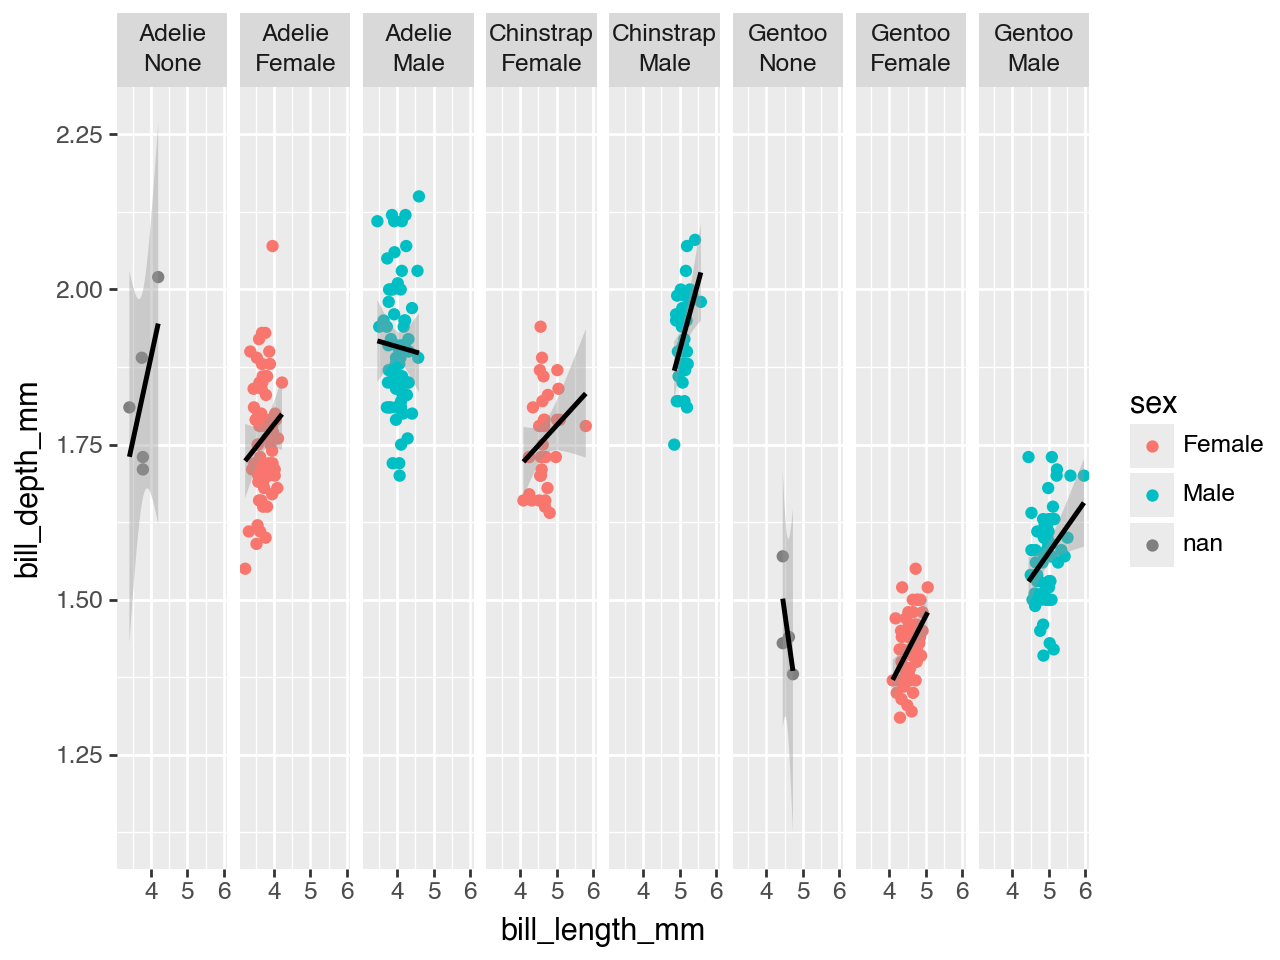

In [89]:
# # review

# 1. db에 데이터 업로드, file을 메모리 DB에 업로드
# df = pd.read_csv("penguins.csv")
# df = ibis.memtable(df)

# type(df)
# 2. 둘 중에 택 1 후 데이터 전처리

# 3. 결측치, 중복치, 확인
# df.count()
# df.nunique()

# 각 컬럼별 결측치 개수
# t.select(s.across(s.all(), _.isnull().sum())).head(1)

# t2 = t.dropna()
# t.count()
# t2.count()


# 4. 데이터 추출 (행추출)
# t2.filter((_.species == "Adelie") & (_.bill_length_mm >= _.bill_length_mm.mean()))


# 5. 데이터 추출 (열추출)
# t2.select("island", "species")
# t2.select(s.contains("mm"),  _.species)


# 6. 데이터 정렬
# t2.order_by("island", ibis.desc("species"))


# 7. 데이터 그룹핑 및 요약
# t2.group_by("island", "species")\
#   .agg(s.across(s.numeric(), _.mean()))\
#   .order_by("island", "species")


# 8. 변수 생성 및 열별로 함수 적용
tmp = t.mutate(s.across(s.contains("mm"), _ / 10))
type(tmp)

from plotnine import *

ggplot(tmp, aes("bill_length_mm", "bill_depth_mm", group = "species")) +\
geom_point(aes(color = "sex")) +\
geom_smooth(method = "lm") +\
facet_grid(". ~ species + sex")


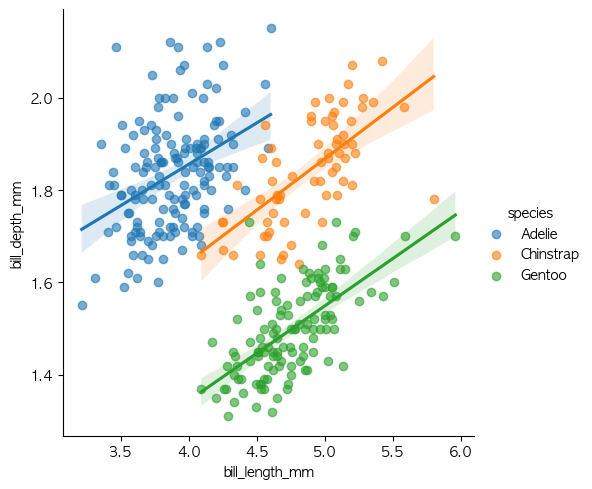

In [25]:
# 방법 2: relplot + 회귀선
import seaborn as sns

sns.lmplot(
    data        = tmp, 
    x           = "bill_length_mm", 
    y           = "bill_depth_mm", 
    hue         = "species",
    scatter_kws = {'alpha': 0.6},  # 점 투명도
    ci          = 95  # 신뢰구간 (None으로 제거 가능)
)
plt.show()

In [125]:
tmp

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           3.91 │          1.87 │              18.1 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           3.95 │          1.74 │              18.6 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           4.03 │          1.80 │              19.5 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │           3.67 │          1.93 │              19.3 │      3450.0 │ Female │
│ Adelie  │ Torgersen │           3.93 │          2.06 │              19.0 │      3650.0 │ Male   │
│ Adelie  │ Torgersen │           3.89 │          1.78 │              18.1 │      3625.0 │ Female │
│ Adelie  │ Torgersen │           3.92 │          1.96 │              19.5 │      4675.0 │ Male   │
│ Adelie  │ Torgersen │           3.41 │          1.81 │              19.3 │      3475.0 │ NULL   │
│ Adelie  │ Torgersen │           4.20 │          2.02 │              19.0 │      4250.0 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

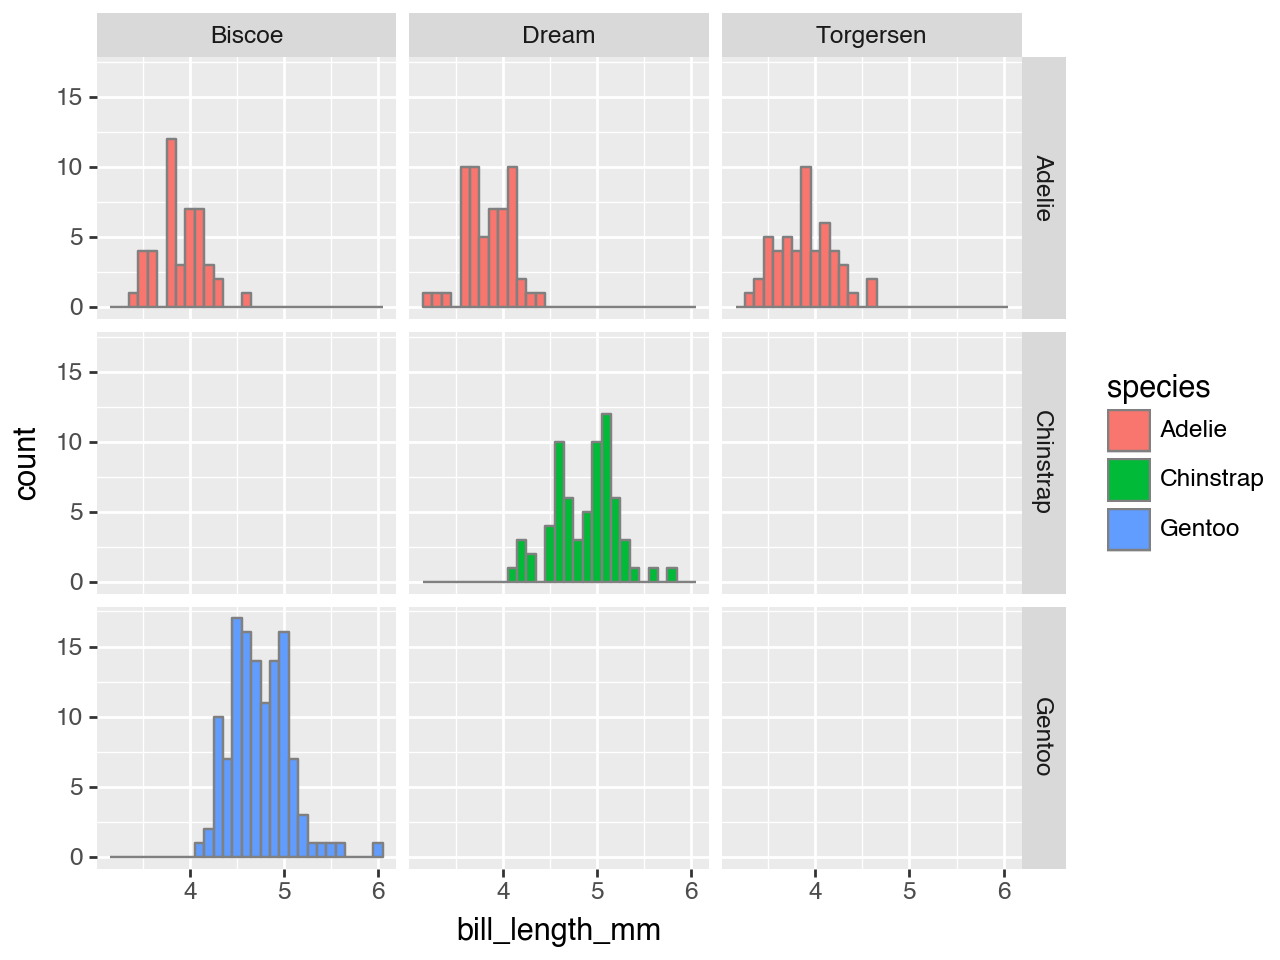

In [134]:
ggplot(tmp, aes(x = "bill_length_mm", fill = "species")) +\
    geom_histogram(color = "grey", binwidth = 0.1) +\
    facet_grid("species ~ island")
    